In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# Chemin vers le répertoire contenant les fichiers
folder_path = "/content/pharmacie"

#lister les fichiers
file_path = [os.path.join(folder_path,file) for file in os.listdir(folder_path) if file.endswith('.csv')]

#lister les fichiers dans un dataframe
d = [pd.read_csv(file) for file in file_path]

print("les données de employee_survey_data")
#Afficher les données
print(d[0].head())
print()

#voir la taille des données
print("voici la taille des données:")
print(d[0].shape)
print()

#voir les infos
print("infos:")
d[0].info()
print()

print("le nombre de valeur nulles:")
d[0].isnull().sum()

les données de employee_survey_data
   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  St

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeID,0
Gender,0


In [10]:
#Afficher le résumé statistique
print("Voici le résuméstatistiques de emplyee_survey_data:")
d[0].describe()

Voici le résuméstatistiques de emplyee_survey_data:


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [11]:
print("les données de general_data")
#Afficher les données
print(d[1].head())
print()

#voir la taille des données
print("voici la taille des données:")
print(d[1].shape)
print()

print("infos:")
d[1].info()
print()

print("le nombre de valeur nulles:")
d[1].isnull().sum()

les données de general_data
   Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:5

,0
Unnamed: 0,0
2015-01-01,4410
2015-01-02,209
2015-01-05,206
2015-01-06,228
...,...
2015-12-25,4410
2015-12-28,234
2015-12-29,230
2015-12-30,265


In [6]:
print("les données de in_time")
#Afficher les données
print(d[2].head())
print()

#voir la taille des données
print("voici la taille des données:")
print(d[2].shape)
print()

print("infos:")
d[2].info()
print()

print("le nombre de valeur nulles:")
d[2].isnull().sum()

les données de in_time
   EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

voici la taille des données:
(4410, 4)

infos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB

Voici le

,0
EmployeeID,0
EnvironmentSatisfaction,25
JobSatisfaction,20
WorkLifeBalance,38


In [13]:
#Afficher le résumé statistique
print("Voici le résuméstatistiques de in_time:")
d[2].describe()

Voici le résuméstatistiques de in_time:


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


In [14]:
print("les données de manager_survey_data")
#Afficher les données
print(d[3].head())
print()

#voir la taille des données
print("voici la taille des données:")
print(d[3].shape)
print()

print("infos:")
d[3].info()
print()

print("le nombre de valeur nulles:")
d[3].isnull().sum()

les données de manager_survey_data
   Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 

,0
Unnamed: 0,0
2015-01-01,4410
2015-01-02,209
2015-01-05,206
2015-01-06,228
...,...
2015-12-25,4410
2015-12-28,234
2015-12-29,230
2015-12-30,265


In [15]:
print("les données de out_time")
#Afficher les données
print(d[4].head())
print()

#voir la taille des données
print("voici la taille des données:")
print(d[4].shape)
print()

print("infos:")
d[4].info()
print()

print("le nombre de valeur nulles:")
d[4].isnull().sum()

les données de out_time
   EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3

voici la taille des données:
(4410, 3)

infos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB

le nombre de valeur nulles:


,0
EmployeeID,0
JobInvolvement,0
PerformanceRating,0


In [16]:
#Afficher le résumé statistique
print("Voici le résuméstatistiques de out_time:")
d[4].describe()

Voici le résuméstatistiques de out_time:


,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


In [17]:
import os
import pandas as pd

# Chemin des fichiers
folder_path = '/content/pharmacie'

# Liste des fichiers à traiter
files = [
    "employee_survey_data.csv",
    "general_data(5).csv",
    "in_time.csv",
    "out_time.csv",
    "manager_survey_data(3).csv"
]

# Vérifiez si les fichiers existent avant de les charger
for file in files:
    file_path = os.path.join(folder_path, file)

    # Vérification de l'existence du fichier
    if os.path.exists(file_path):
        print(f"Le fichier {file} existe, traitement en cours...")

        try:
            # Charger le fichier CSV
            data = pd.read_csv(file_path)

            # Afficher les valeurs manquantes avant remplacement
            print(f"\nValeurs manquantes dans {file} avant remplacement :")
            print(data.isnull().sum())

            # Traiter les colonnes numériques
            numeric_columns = data.select_dtypes(include=['number']).columns
            data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

            # Traiter les colonnes non numériques (catégorielles)
            object_columns = data.select_dtypes(include=['object']).columns
            for column in object_columns:
                data[column].fillna(data[column].mode().iloc[0], inplace=True)

            # Afficher les valeurs manquantes après remplacement
            print(f"\nValeurs manquantes dans {file} après remplacement :")
            print(data.isnull().sum())

        except Exception as e:
            print(f"Erreur lors du traitement du fichier {file} : {e}")
    else:
        print(f"Erreur : Le fichier {file} n'a pas été trouvé à l'emplacement {file_path}.")


Le fichier employee_survey_data.csv existe, traitement en cours...

Valeurs manquantes dans employee_survey_data.csv avant remplacement :
EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

Valeurs manquantes dans employee_survey_data.csv après remplacement :
EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64
Erreur : Le fichier general_data(5).csv n'a pas été trouvé à l'emplacement /content/pharmacie/general_data(5).csv.
Le fichier in_time.csv existe, traitement en cours...

Valeurs manquantes dans in_time.csv avant remplacement :
Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64


<ipython-input-17-8654cdc4c5c7>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode().iloc[0], inplace=True)



Valeurs manquantes dans in_time.csv après remplacement :
Unnamed: 0       0
2015-01-01    4410
2015-01-02       0
2015-01-05       0
2015-01-06       0
              ... 
2015-12-25    4410
2015-12-28       0
2015-12-29       0
2015-12-30       0
2015-12-31       0
Length: 262, dtype: int64
Le fichier out_time.csv existe, traitement en cours...

Valeurs manquantes dans out_time.csv avant remplacement :
Unnamed: 0       0
2015-01-01    4410
2015-01-02     209
2015-01-05     206
2015-01-06     228
              ... 
2015-12-25    4410
2015-12-28     234
2015-12-29     230
2015-12-30     265
2015-12-31     213
Length: 262, dtype: int64


<ipython-input-17-8654cdc4c5c7>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode().iloc[0], inplace=True)



Valeurs manquantes dans out_time.csv après remplacement :
Unnamed: 0       0
2015-01-01    4410
2015-01-02       0
2015-01-05       0
2015-01-06       0
              ... 
2015-12-25    4410
2015-12-28       0
2015-12-29       0
2015-12-30       0
2015-12-31       0
Length: 262, dtype: int64
Erreur : Le fichier manager_survey_data(3).csv n'a pas été trouvé à l'emplacement /content/pharmacie/manager_survey_data(3).csv.


In [18]:
# Vérification du type de données après conversion
print(d[1].dtypes)
print(d[3].dtypes)


Unnamed: 0      int64
2015-01-01    float64
2015-01-02     object
2015-01-05     object
2015-01-06     object
               ...   
2015-12-25    float64
2015-12-28     object
2015-12-29     object
2015-12-30     object
2015-12-31     object
Length: 262, dtype: object
Unnamed: 0      int64
2015-01-01    float64
2015-01-02     object
2015-01-05     object
2015-01-06     object
               ...   
2015-12-25    float64
2015-12-28     object
2015-12-29     object
2015-12-30     object
2015-12-31     object
Length: 262, dtype: object


In [19]:
# Convertir les colonnes en datetime
d[1].iloc[:, 1:] = d[1].iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
d[3].iloc[:, 1:] = d[3].iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

print(d[1].dtypes)
print(d[3].dtypes)


<ipython-input-19-83c68f01864f>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
4405   NaT
4406   NaT
4407   NaT
4408   NaT
4409   NaT
Name: 2015-01-01, Length: 4410, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  d[1].iloc[:, 1:] = d[1].iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
<ipython-input-19-83c68f01864f>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
4405   NaT
4406   NaT
4407   NaT
4408   NaT
4409   NaT
Name: 2015-01-14, Length: 4410, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  d[1].iloc[:, 1:] = d[1].iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
<ipython-i

Unnamed: 0             int64
2015-01-01    datetime64[ns]
2015-01-02            object
2015-01-05            object
2015-01-06            object
                   ...      
2015-12-25    datetime64[ns]
2015-12-28            object
2015-12-29            object
2015-12-30            object
2015-12-31            object
Length: 262, dtype: object
Unnamed: 0             int64
2015-01-01    datetime64[ns]
2015-01-02            object
2015-01-05            object
2015-01-06            object
                   ...      
2015-12-25    datetime64[ns]
2015-12-28            object
2015-12-29            object
2015-12-30            object
2015-12-31            object
Length: 262, dtype: object


<ipython-input-19-83c68f01864f>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
4405   NaT
4406   NaT
4407   NaT
4408   NaT
4409   NaT
Name: 2015-12-25, Length: 4410, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  d[3].iloc[:, 1:] = d[3].iloc[:, 1:].apply(pd.to_datetime, errors='coerce')


In [20]:
# Forcer la conversion des dates en datetime pour chaque colonne (sauf EmployeeID)
for col in d[1].columns[1:]:
    d[1][col] = pd.to_datetime(d[1][col], errors='coerce')

for col in d[3].columns[1:]:
    d[3][col] = pd.to_datetime(d[3][col], errors='coerce')

# Vérification des types de données après conversion
print(d[1].dtypes)
print(d[3].dtypes)



Unnamed: 0             int64
2015-01-01    datetime64[ns]
2015-01-02    datetime64[ns]
2015-01-05    datetime64[ns]
2015-01-06    datetime64[ns]
                   ...      
2015-12-25    datetime64[ns]
2015-12-28    datetime64[ns]
2015-12-29    datetime64[ns]
2015-12-30    datetime64[ns]
2015-12-31    datetime64[ns]
Length: 262, dtype: object
Unnamed: 0             int64
2015-01-01    datetime64[ns]
2015-01-02    datetime64[ns]
2015-01-05    datetime64[ns]
2015-01-06    datetime64[ns]
                   ...      
2015-12-25    datetime64[ns]
2015-12-28    datetime64[ns]
2015-12-29    datetime64[ns]
2015-12-30    datetime64[ns]
2015-12-31    datetime64[ns]
Length: 262, dtype: object


In [21]:
# Fusion des données
merged_data = pd.merge(d[0], d[2], on="EmployeeID", how="inner")
merged_data = pd.merge(merged_data, d[4], on="EmployeeID", how="inner")

# Extraction des colonnes de temps en utilisant .iloc pour sélectionner les lignes et colonnes
start_times = d[3].iloc[:, 1:]  # Toutes les lignes, colonnes à partir de l'indice 1
end_times = d[1].iloc[:, 1:]    # Toutes les lignes, colonnes à partir de l'indice 1

# Assurez-vous que les colonnes sont de type datetime
start_times = start_times.apply(pd.to_datetime)
end_times = end_times.apply(pd.to_datetime)

# Calcul des heures travaillées
working_hours = (end_times - start_times).apply(lambda x: x.dt.total_seconds() / 3600, axis=1)

# Ajout de la moyenne des heures travaillées
merged_data['AverageWorkingHours'] = working_hours.mean(axis=1)

# Vérification des données fusionnées
print(merged_data.head())


   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   TrainingTimesLastYear YearsAtCompany YearsSinceLastPromotion  \
0                  

In [22]:
# Séparation des données en variables indépendantes (X) et variable cible (y)
X = merged_data.drop('Attrition', axis=1)  # Supposons que 'Attrition' est la colonne cible
y = merged_data['Attrition']

# Gestion des variables catégorielles : encodage
X = pd.get_dummies(X, drop_first=True)  # Pour éviter la multicolinéarité (ex: transformer 'Gender' en 0 ou 1)


In [23]:

# Diviser les données en train et test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Imputation des NaN avec la moyenne
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [25]:

# Imputer les colonnes numériques avec la médiane
imputer = SimpleImputer(strategy='median')
numeric_columns = ['NumCompaniesWorked', 'TotalWorkingYears']
X_train[numeric_columns] = imputer.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = imputer.transform(X_test[numeric_columns])


In [26]:
# Imputer les colonnes ordinales
ordinal_columns = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train[ordinal_columns] = imputer_cat.fit_transform(X_train[ordinal_columns])
X_test[ordinal_columns] = imputer_cat.transform(X_test[ordinal_columns])


In [27]:

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=45)  # K=5 est une valeur courante
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=45)

In [29]:
y_pred = knn.predict(X_test_scaled)


In [30]:
print("Précision :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Précision : 0.8424036281179138

Rapport de classification :
               precision    recall  f1-score   support

          No       0.84      1.00      0.91       741
         Yes       0.75      0.02      0.04       141

    accuracy                           0.84       882
   macro avg       0.80      0.51      0.48       882
weighted avg       0.83      0.84      0.77       882



In [31]:
import numpy as np

n_features = 42  # Nombre de caractéristiques des données
n_samples = 5   # Nombre d'exemples que vous souhaitez générer

# Générer des données aléatoires
new_data = np.random.rand(n_samples, n_features)  # Génère des valeurs entre 0 et 1

# Prédictions pour les nouvelles données
new_predictions = knn.predict(new_data)

print("Nouvelles données (X) :\n", new_data)
print("\nPrédictions (y) :\n", new_predictions)

Nouvelles données (X) :
 [[0.51980933 0.07470518 0.6992322  0.63905024 0.23198363 0.26802047
  0.97922491 0.20088921 0.40110529 0.60395953 0.32120561 0.63075515
  0.8397169  0.40350884 0.60360195 0.40731009 0.63146003 0.85171338
  0.77395025 0.76518132 0.87846251 0.84881555 0.39286797 0.38789261
  0.28310086 0.26873333 0.42117714 0.39663635 0.45463928 0.76215746
  0.97748805 0.02559027 0.67619808 0.56203776 0.58747812 0.81843466
  0.77020319 0.50968881 0.00585175 0.20692221 0.99020732 0.94837648]
 [0.91264571 0.60437001 0.69615137 0.83985585 0.47300759 0.05425724
  0.30192544 0.06618409 0.37101621 0.31928361 0.36337278 0.8895895
  0.09160537 0.46630875 0.43125071 0.69451636 0.51411974 0.563759
  0.05053973 0.50042833 0.979776   0.00246619 0.9150831  0.62844155
  0.92549263 0.92218168 0.5471885  0.45702095 0.05913268 0.95822207
  0.25969182 0.61928662 0.90130018 0.38935195 0.52366087 0.58850714
  0.13636676 0.91160837 0.28607781 0.28414641 0.13650748 0.00169339]
 [0.8513259  0.1426328  

In [32]:
from sklearn.linear_model import LogisticRegression

# Modèle
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Évaluation
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("matrice de confusion:",confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8503401360544217
matrice de confusion: [[715  26]
 [106  35]]
              precision    recall  f1-score   support

          No       0.87      0.96      0.92       741
         Yes       0.57      0.25      0.35       141

    accuracy                           0.85       882
   macro avg       0.72      0.61      0.63       882
weighted avg       0.82      0.85      0.82       882



In [34]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


ROC-AUC Score: 0.7760166920301298


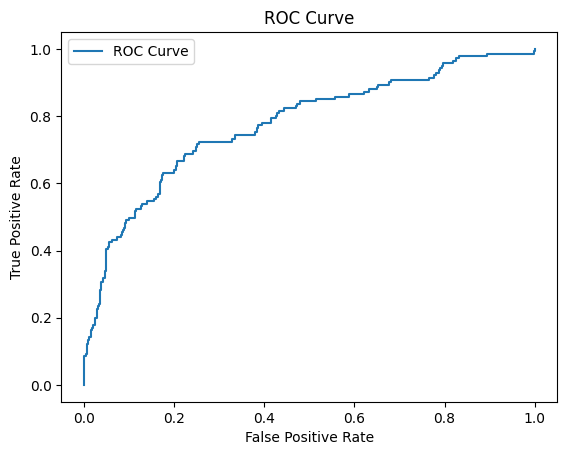

In [35]:
# Conversion de 'Yes' en 1 et 'No' en 0 dans y_test
y_test_numeric = y_test.map({'No': 0, 'Yes': 1})

# Calcul de la courbe ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [36]:
# Conversion manuelle
y_train = y_train.replace({'No': 0, 'Yes': 1})
y_test = y_test.replace({'No': 0, 'Yes': 1})
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)


<ipython-input-36-80f0f5fc4590>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'No': 0, 'Yes': 1})
<ipython-input-36-80f0f5fc4590>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'No': 0, 'Yes': 1})


LinearRegression()

In [37]:
y_predict = lin_reg.predict(X_test_scaled)
# Réalisation de la prédiction avec un modèle de régression linéaire (lin_reg)
print("Predictions:", y_predict)  # Prédictions basées sur les données préparées

Predictions: [-1.14125739e-01  3.44924490e-01 -3.78158338e-02  5.02464602e-01
  1.97309361e-01 -7.94069282e-02 -8.02531779e-02  4.54793059e-01
  2.43205299e-01 -3.86464057e-02 -3.76065848e-02  9.03656732e-02
  3.04507596e-01 -2.55281322e-02  2.63934557e-02  2.68474656e-01
  9.09491531e-02  3.60675562e-02  1.76797370e-01  2.25032736e-01
  5.89789911e-01 -8.22030990e-02  1.81816915e-02  3.09148046e-01
 -5.31707323e-03  1.94667889e-01  6.38441540e-02  3.02726366e-01
  2.44944235e-02  1.46184147e-01  2.33096026e-01  6.07901974e-02
 -9.82270733e-02  2.85793496e-02  1.59071781e-01 -2.61468452e-02
  2.89518978e-01  3.66575971e-01 -5.80479806e-02  8.36068133e-02
  2.65065539e-03  1.60757397e-01  2.40875675e-01  1.40740530e-01
  1.76362276e-01  3.82838981e-01 -3.12993748e-02  5.17312688e-01
  2.22013924e-01  8.25206085e-02  4.66593409e-02  1.66145336e-01
  2.45244378e-01 -6.60818796e-02  2.98760357e-01  4.34335993e-01
 -3.20086844e-02  3.70491397e-02  1.93227218e-01  4.65281261e-01
  3.34257546

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
# Évaluer la performance
mse = mean_squared_error(y_test, y_predict)  # Erreur quadratique moyenne
r2 = r2_score(y_test, y_predict)            # Coefficient de détermination

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R²):", r2)

Mean Squared Error (MSE): 0.11687029549786987
Coefficient of Determination (R²): 0.12983022985150483


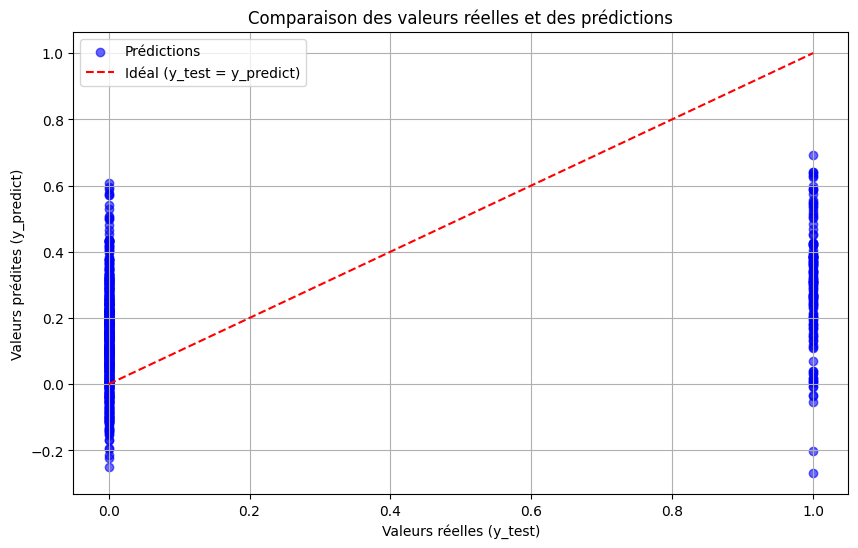

In [39]:
# Tracer le graphe
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, alpha=0.6, color='blue', label="Prédictions")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Idéal (y_test = y_predict)")
plt.title("Comparaison des valeurs réelles et des prédictions")
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Valeurs prédites (y_predict)")
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       741
           1       0.98      0.57      0.72       141

    accuracy                           0.93       882
   macro avg       0.95      0.79      0.84       882
weighted avg       0.93      0.93      0.92       882


Confusion Matrix:
[[739   2]
 [ 60  81]]


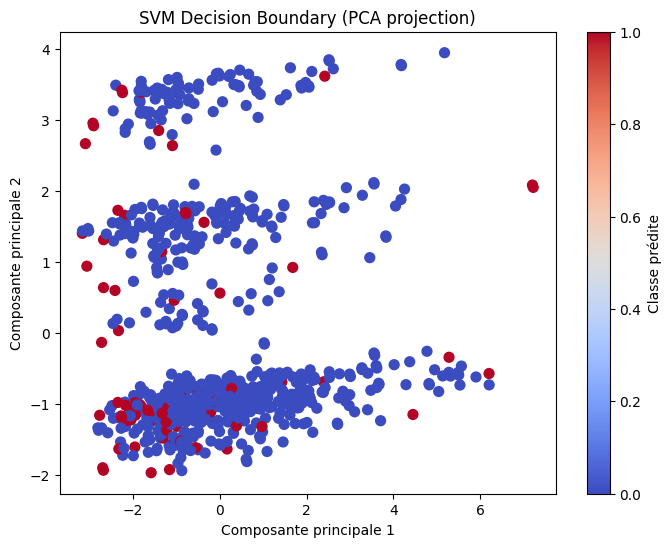

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC  # Importer le classificateur SVM
from sklearn.datasets import make_classification  # Générer un jeu de données factice
# 4. Entraîner le modèle SVM avec un noyau linéaire (kernel='linear')
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 5. Prédire les labels pour l'ensemble de test
y_pred = svm_model.predict(X_test_scaled)

# 6. Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Visualiser (si nécessaire, par exemple dans un cas 2D)
# Réduire la dimensionnalité des données pour une visualisation 2D (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Tracer les données de test et les frontières de décision
plt.figure(figsize=(8, 6))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred, cmap=plt.cm.coolwarm, s=50)
plt.title("SVM Decision Boundary (PCA projection)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(label='Classe prédite')
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Créer et entraîner le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prédictions sur les données de test
y_pred = rf_model.predict(X_test_scaled)

# Évaluer les performances du modèle
print("Précision:", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

Précision: 0.9886621315192744

Matrice de confusion:
[[741   0]
 [ 10 131]]

Rapport de classification:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       741
           1       1.00      0.93      0.96       141

    accuracy                           0.99       882
   macro avg       0.99      0.96      0.98       882
weighted avg       0.99      0.99      0.99       882



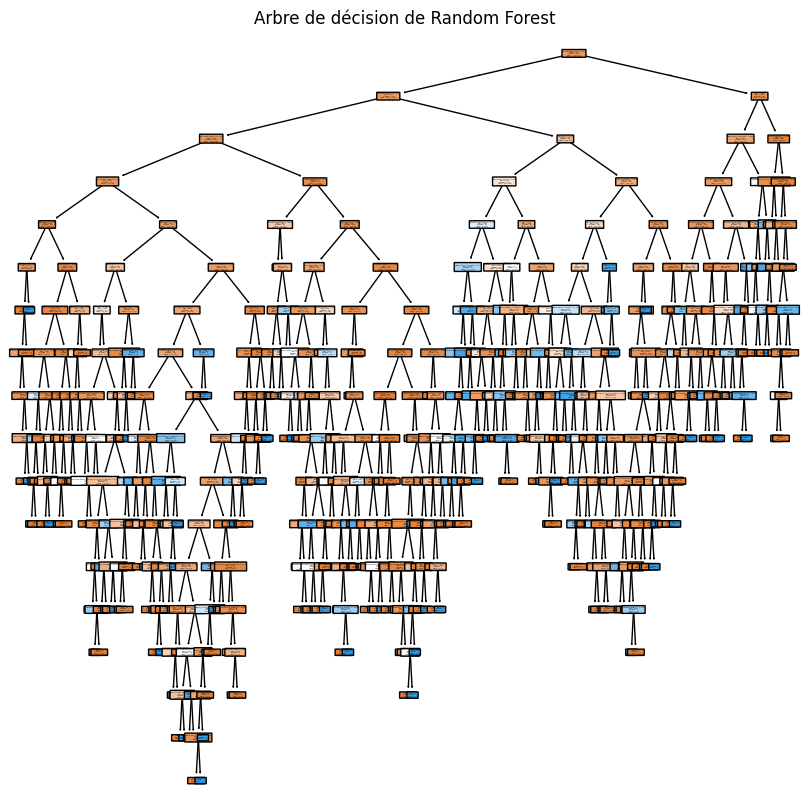

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
# Sélectionner un arbre spécifique dans la forêt
tree = rf_model.estimators_[0]  # Premier arbre de la forêt

# Tracer l'arbre de décision
plt.figure(figsize=(10, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Ne partira pas', 'Partira'], rounded=True)
plt.title('Arbre de décision de Random Forest')
plt.show()